# Travel Package Analysis

[Himanshu Goswami](https://github.com/HimGos) - September 2022

***To Travel Is To Live!***

This quote belongs to Hans Christian Andersen and used by a Travel Company who is looking to sell their Travel Packages.

In this Exploratory Data Analysis report I'm going to analyse a dataset provided by one such Travel company and will share my insights/observations at every step. At the end of the report I will provide a detailed conclusion of this report.

To perform a detailed EDA (Exploratory Data Analysis), these 3 steps will be followed :-
- **Profiling the Data** -> This step concludes checking all features(variable/columns), segregating data types, check out for duplicate or missing data etc.
- **Statistics Based Analysis** -> This step is all about interpreting the data using stats. We find out mean, variance, covariance, std. dev etc. to perform various tests like z-test, chi-square test etc.
- **Graph Based Analysis** -> I'd call this step as a MAJOR step. 2 Reasons ... First, we can figure out hidden data just by visualization ... Second, a Data Analyst doesn't always create such report for himself/herself. Often we need to show reports to non-tech people, and we don't want to puzzle them with tech jargon.

Let's begin the analysis!

--------------------------------------------------------------------------------------------------

In [1]:
# Importing Required Libraries

import pandas as pd
import numpy as np
from scipy.stats import normaltest
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading dataset using Pandas

df = pd.read_csv("data/Travel.csv")

In [3]:
# Reading our dataset

print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 4888 rows and 20 columns.


In [4]:
# checking the random records of dataset
df.sample(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
509,200509,0,33.0,Company Invited,1,12.0,Salaried,Male,1,3.0,Deluxe,3.0,Married,4.0,0,5,1,0.0,Manager,22725.0
3880,203880,0,22.0,Self Enquiry,3,12.0,Small Business,Male,3,4.0,Basic,5.0,Single,3.0,1,1,1,1.0,Executive,21058.0
3219,203219,0,44.0,Self Enquiry,3,32.0,Small Business,Male,4,5.0,Standard,3.0,Married,7.0,0,4,1,2.0,Senior Manager,29476.0
2024,202024,0,27.0,Self Enquiry,1,13.0,Small Business,Female,2,4.0,Deluxe,5.0,Unmarried,1.0,0,3,1,0.0,Manager,21811.0
1154,201154,0,47.0,Self Enquiry,2,32.0,Salaried,Female,3,3.0,King,3.0,Married,4.0,0,4,1,NaN,VP,34658.0


- Travel Dataset has been successfully loaded with 4888 rows and 20 columns.

----------------------------------------------------------------------------------------------------------------------------------------

# Step 1 : Profiling the Data

In [5]:
# Creating a copy of original dataset, in case something goes wrong.

df_original = df.copy()

In [6]:
# Checking the features of dataset

df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [7]:
# Checking unique values in each column

df.nunique()

CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

In [8]:
# There are some misspelled values in Gender column where Female is written as Fe Male. Fixing that too.

df['Gender'] = df['Gender'].replace('Fe Male', 'Female')

> ### Changing Datatypes & Reducing Memory

In [9]:
# Reducing memory usage of dataset by Dropping unwanted column

df.drop(['CustomerID'], axis=1, inplace=True)

In [10]:
# Changing dtypes of columns to 'category'

# cat_cols = ['CityTier','ProdTaken','NumberOfPersonVisiting','NumberOfChildrenVisiting','PreferredPropertyStar','Passport','PitchSatisfactionScore','OwnCar']
# df[cat_cols] = df[cat_cols].astype('category')

- It's better to remove unwanted columns to reduce memory. However, we can also change dtype of known categorical columns to 'category' to save even more space but that doesn't allow us to take median values during 'Missing Data Handling' operation so am skipping that part.

In [11]:
# Checking Duplicated Data

df.duplicated().sum()

141

- There are 141 Duplicate Fields!!
- Removing these duplicate fields in next step

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
# More info of features

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4747 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4747 non-null   int64  
 1   Age                       4531 non-null   float64
 2   TypeofContact             4722 non-null   object 
 3   CityTier                  4747 non-null   int64  
 4   DurationOfPitch           4501 non-null   float64
 5   Occupation                4747 non-null   object 
 6   Gender                    4747 non-null   object 
 7   NumberOfPersonVisiting    4747 non-null   int64  
 8   NumberOfFollowups         4703 non-null   float64
 9   ProductPitched            4747 non-null   object 
 10  PreferredPropertyStar     4721 non-null   float64
 11  MaritalStatus             4747 non-null   object 
 12  NumberOfTrips             4609 non-null   float64
 13  Passport                  4747 non-null   int64  
 14  PitchSat

> ### Handling Missing Values

In [14]:
# Getting sum of missing values in each column

df.isnull().sum()

ProdTaken                     0
Age                         216
TypeofContact                25
CityTier                      0
DurationOfPitch             246
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            44
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               138
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     60
Designation                   0
MonthlyIncome               224
dtype: int64

**2 points to take look at here :-**
- First, we have 8 rows with missing values.
- Second, out of these 8, 2 of them are numerical columns which need to be treated separately.

We should not forget that our dataset has customers holding various designations. So using median/mean on all of them won't give us accurate result. Eg. Monthly income of a Manager and Executive are different so they will affect the median value of each other.

In [15]:
# Separating columns having categorical data with numbers

non_numerical_columns = df.select_dtypes(include=np.number).columns.tolist()

# non_numerical_columns.remove('CustomerID')
non_numerical_columns.remove('Age')
non_numerical_columns.remove('MonthlyIncome')

non_numerical_columns

['ProdTaken',
 'CityTier',
 'DurationOfPitch',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'NumberOfChildrenVisiting']

In [16]:
# Filling the missing values in columns (excluding Age, MonthlyIncome) using median value

df[non_numerical_columns] = df[non_numerical_columns].transform(lambda x: x.fillna(x.median()))

# Filling the missing value of 'TypeofContact' column using mode function since it contains string

df['TypeofContact'] = df['TypeofContact'].transform(lambda x: x.fillna(x.mode()[0]))

In [17]:
# Filling the missing values in Age & MonthlyIncome columns. Here we will consider Designation feature to groupby the customers.

df['Age'] = df.groupby('Designation')['Age'].transform(lambda x: x.fillna(x.median()))
df['MonthlyIncome'] = df.groupby('Designation')['MonthlyIncome'].transform(lambda x: x.fillna(x.median()))

In [18]:
# Checking if our missing values has been fixed!

df.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

- Using simple median & mode, we were able to fix the Missing Data in our dataset.


> #### **Summary of Numerical Features**

In [19]:
# Checking the statistical values in our dataset so far

df.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4747.0,0.188329,0.391016,0.0,0.0,0.0,0.0,1.0
Age,4747.0,37.396882,9.164235,18.0,31.0,36.0,43.0,61.0
CityTier,4747.0,1.655151,0.917416,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4747.0,15.380872,8.330097,5.0,9.0,13.0,19.0,127.0
NumberOfPersonVisiting,4747.0,2.911734,0.724040,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4747.0,3.707815,1.004388,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4747.0,3.580156,0.799316,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4747.0,3.226459,1.821210,1.0,2.0,3.0,4.0,22.0
Passport,4747.0,0.289657,0.453651,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4747.0,3.051612,1.369584,1.0,2.0,3.0,4.0,5.0


> #### Observations:-
> - As per the dataset, the average age is between 36-37 years.
> - Mostly customers are from Tier 1 city. That means they are good earners.
> - Pitch Satisfaction Score of this company is 3 out of 5. They can work on it.
> - Maximum duration of pitch is 127 mins!
> - On an average, 3 follow-ups are done on clients.
> - Mostly clients prefer 3-Star Property.
> - On an average a client takes 3 trips yearly. 22 being the highest.

> #### Summary of Categorical Features

In [20]:
df.describe(include='object').T

,count,unique,top,freq
TypeofContact,4747,2,Self Enquiry,3375
Occupation,4747,4,Salaried,2293
Gender,4747,2,Male,2835
ProductPitched,4747,5,Basic,1800
MaritalStatus,4747,4,Married,2279
Designation,4747,5,Executive,1800


In [21]:
# Creating a function to get percentage of unique values in each column

def get_percentage(dataf, col_list):
    for i in col_list:
        print((dataf[i].value_counts()/dataf[i].value_counts().sum())*100, "\n")

In [22]:
# Gettting the percentage of unique values in all non-numeric columns

# numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
non_num_columns = df.select_dtypes(exclude=[np.number]).columns.tolist()

get_percentage(df, non_num_columns)

Self Enquiry       71.097535
Company Invited    28.902465
Name: TypeofContact, dtype: float64 

Salaried          48.304192
Small Business    42.721719
Large Business     8.931957
Free Lancer        0.042132
Name: Occupation, dtype: float64 

Male      59.72193
Female    40.27807
Name: Gender, dtype: float64 

Basic           37.918685
Deluxe          35.475037
Standard        15.041079
Super Deluxe     6.825363
King             4.739836
Name: ProductPitched, dtype: float64 

Married      48.009269
Divorced     20.012640
Single       18.432694
Unmarried    13.545397
Name: MaritalStatus, dtype: float64 

Executive         37.918685
Manager           35.475037
Senior Manager    15.041079
AVP                6.825363
VP                 4.739836
Name: Designation, dtype: float64 



> #### Observations :
> - Self Enquiry is the preferred Type of Contact.
> - Majority of customers are Salaried (48.3%) or Small Business Owners (42.7%).
> - There are more male customers than female.
> - Mostly customers were pitched Basic product followed by Deluxe.
> - 48% of customers are married.
> - Executives & Managers travel the most out of all other Designations.

----------------------------------------------------------------------------------------------------------------------------------------

# Step 2 : Statistics Based Analysis

- Step 2 (Statistic Based Analysis) and Step 3 (Graph Based Analysis) can be done together since graphical representations require statistics often.
- In this EDA, I am doing these steps separately for clarification of steps.

In [23]:
# Getting standard deviation, Median, Mean, Minimum & Maximum values of each column

df.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4747.0,0.188329,0.391016,0.0,0.0,0.0,0.0,1.0
Age,4747.0,37.396882,9.164235,18.0,31.0,36.0,43.0,61.0
CityTier,4747.0,1.655151,0.917416,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4747.0,15.380872,8.330097,5.0,9.0,13.0,19.0,127.0
NumberOfPersonVisiting,4747.0,2.911734,0.724040,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4747.0,3.707815,1.004388,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4747.0,3.580156,0.799316,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4747.0,3.226459,1.821210,1.0,2.0,3.0,4.0,22.0
Passport,4747.0,0.289657,0.453651,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4747.0,3.051612,1.369584,1.0,2.0,3.0,4.0,5.0


In [24]:
# Checking covariance

df.cov()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
ProdTaken,0.152894,-0.518292,0.031246,0.238411,0.002931,0.044925,0.029781,0.019500,0.046575,0.028205,-0.002145,0.003200,-2.678678e+02
Age,-0.518292,83.983201,-0.076549,-0.519714,0.179581,0.075532,-0.128532,2.886715,0.119319,0.169988,0.206562,0.104936,2.266731e+04
CityTier,0.031246,-0.076549,0.841652,0.146331,-0.002843,0.026273,-0.007224,-0.061375,-0.001018,-0.054048,0.001917,0.001218,2.574359e+02
DurationOfPitch,0.238411,-0.519714,0.146331,69.390515,0.428273,0.134697,-0.028218,0.189330,0.129646,-0.018608,-0.005629,0.256121,1.172815e+02
NumberOfPersonVisiting,0.002931,0.179581,-0.002843,0.428273,0.524234,0.236741,0.018981,0.249871,0.004291,-0.014618,0.004382,0.374854,7.568306e+02
NumberOfFollowups,0.044925,0.075532,0.026273,0.134697,0.236741,1.008795,-0.022192,0.244858,0.003530,0.003284,0.004991,0.240626,9.089451e+02
PreferredPropertyStar,0.029781,-0.128532,-0.007224,-0.028218,0.018981,-0.022192,0.638907,0.016294,-0.001625,-0.022153,0.005896,0.022081,1.079916e+00
NumberOfTrips,0.019500,2.886715,-0.061375,0.189330,0.249871,0.244858,0.016294,3.316805,0.012141,-0.014430,-0.014744,0.250654,1.094934e+03
Passport,0.046575,0.119319,-0.001018,0.129646,0.004291,0.003530,-0.001625,0.012141,0.205799,-0.001889,-0.004482,0.006170,7.666391e+00
PitchSatisfactionScore,0.028205,0.169988,-0.054048,-0.018608,-0.014618,0.003284,-0.022153,-0.014430,-0.001889,1.875760,0.047129,0.000882,2.033131e+02


- Covariance is a statistical term that refers to a systematic relationship between two random variables in which a change in the other reflects a change in one variable.

- The covariance value can range from -∞ to +∞, with a negative value indicating a negative relationship and a positive value indicating a positive relationship.


- **Better to check correlation for clear insight**

In [25]:
# Checking correlation in data

df.corr()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
ProdTaken,1.000000,-0.144638,0.087104,0.073195,0.010352,0.114390,0.095285,0.027383,0.262567,0.052667,-0.011289,0.009567,-0.129952
Age,-0.144638,1.000000,-0.009105,-0.006808,0.027065,0.008206,-0.017547,0.172961,0.028701,0.013544,0.046377,0.013388,0.469202
CityTier,0.087104,-0.009105,1.000000,0.019148,-0.004280,0.028513,-0.009851,-0.036734,-0.002446,-0.043015,0.004300,0.001552,0.053230
DurationOfPitch,0.073195,-0.006808,0.019148,1.000000,0.071008,0.016099,-0.004238,0.012480,0.034307,-0.001631,-0.001390,0.035949,0.002671
NumberOfPersonVisiting,0.010352,0.027065,-0.004280,0.071008,1.000000,0.325544,0.032798,0.189493,0.013065,-0.014741,0.012453,0.605330,0.198286
NumberOfFollowups,0.114390,0.008206,0.028513,0.016099,0.325544,1.000000,-0.027643,0.133861,0.007747,0.002387,0.010223,0.280113,0.171669
PreferredPropertyStar,0.095285,-0.017547,-0.009851,-0.004238,0.032798,-0.027643,1.000000,0.011193,-0.004483,-0.020236,0.015177,0.032300,0.000256
NumberOfTrips,0.027383,0.172961,-0.036734,0.012480,0.189493,0.133861,0.011193,1.000000,0.014695,-0.005785,-0.016658,0.160919,0.114047
Passport,0.262567,0.028701,-0.002446,0.034307,0.013065,0.007747,-0.004483,0.014695,1.000000,-0.003041,-0.020330,0.015901,0.003206
PitchSatisfactionScore,0.052667,0.013544,-0.043015,-0.001631,-0.014741,0.002387,-0.020236,-0.005785,-0.003041,1.000000,0.070803,0.000753,0.028160


> #### Observation :- Since +1 & -1 represent strong & weak relation respectively. There is no strong & weak correlation among any of the columns.

In [26]:
# Checking if there is skewness in any of the column

df.skew()

ProdTaken                   1.594828
Age                         0.432968
CityTier                    0.734402
DurationOfPitch             1.846130
NumberOfPersonVisiting      0.028372
NumberOfFollowups          -0.380692
PreferredPropertyStar       0.898797
NumberOfTrips               1.510138
Passport                    0.927727
PitchSatisfactionScore     -0.102405
OwnCar                     -0.484362
NumberOfChildrenVisiting    0.278938
MonthlyIncome               2.049170
dtype: float64

> #### Observation :-
> - A **skewness value of 0** denotes a symmetrical distribution of values. In our data, there is only one column 'Number of Person Visiting' which is quite near to 0.
> - A **negative skewness** indicates an asymmetry in the distribution. That means the tail is longer on left side. Higher the negative, more the possibility of outliers in data. eg. columns like - 'OwnCar' , 'Number of Follow-ups'
> - A **positive skewness** indicates an asymmetry in the distribution. That means the tail is longer on right side. Higher the positive, more the possibility of outliers in data. eg. columns like - 'Duration of Pitch' , 'Number of Trips' , 'Monthly Income'

In [27]:
# Finding out what are the stats of those who have Purchased Product i.e. ProdTaken = 1

df.loc[df['ProdTaken']==1].describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,894.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Age,894.0,34.645414,9.946587,18.0,28.0,32.0,41.0,60.0
CityTier,894.0,1.821029,0.960219,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,894.0,16.646532,8.301318,6.0,10.0,14.0,22.0,36.0
NumberOfPersonVisiting,894.0,2.927293,0.703753,2.0,2.0,3.0,3.0,4.0
NumberOfFollowups,894.0,3.946309,1.008043,1.0,3.0,4.0,5.0,6.0
PreferredPropertyStar,894.0,3.738255,0.857580,3.0,3.0,3.0,5.0,5.0
NumberOfTrips,894.0,3.329978,2.043112,1.0,2.0,3.0,4.0,20.0
Passport,894.0,0.536913,0.498915,0.0,0.0,1.0,1.0,1.0
PitchSatisfactionScore,894.0,3.201342,1.330055,1.0,2.0,3.0,4.0,5.0


In [28]:
# Finding percentage of people who purchased product

(df.loc[df['ProdTaken']==1]['ProdTaken'].count() / df['ProdTaken'].count())*100

18.832947124499682

> #### Observation :-
> - Only 18% purchased the travel package.
> - Age Group from 32-34 is highly interested in travelling.
> - On an average a customer is being pitched for approx. 15 minutes for a YES!
> - 4 Follow-ups is a good number to make someone purchase product.
> - Majority of customers prefer 3-Star Property.
> - On an average, a client makes 3 trips in a year.
> - An average customer is making $21K in a year.

Before moving to Graph Based Analysis, it would be better to check how many of our charts are gaussian. We will do it using **Normality Test**.

- In normality test we consider numerical features.
- Our main focus is on p-value.
- If **p-value < 0.05** then our data is not Normally Distributed aka **Not Gaussian.**
- If **p-value > 0.05** then our data is Normally Distributed aka **Gaussian.**

In [29]:
# Performing Normal Test & Identifying if data is normally distributed.

num_col = df.select_dtypes(include=[np.number]).columns.tolist()

for i in num_col:
    print(f"{i} : {'Not Gaussian' if normaltest(df[i].values,)[1]<0.05 else 'Gaussian'} | {normaltest(df[i].values)[1]}")

ProdTaken : Not Gaussian | 1.1319748727867456e-241
Age : Not Gaussian | 8.728751608301754e-39
CityTier : Not Gaussian | 0.0
DurationOfPitch : Not Gaussian | 0.0
NumberOfPersonVisiting : Not Gaussian | 1.766394270533766e-83
NumberOfFollowups : Not Gaussian | 2.476310178544693e-34
PreferredPropertyStar : Not Gaussian | 7.5185845630052e-213
NumberOfTrips : Not Gaussian | 0.0
Passport : Not Gaussian | 0.0
PitchSatisfactionScore : Not Gaussian | 0.0
OwnCar : Not Gaussian | 0.0
NumberOfChildrenVisiting : Not Gaussian | 3.2823364495110496e-44
MonthlyIncome : Not Gaussian | 0.0


> #### Observation :-
>
> - Not even a single column is Gaussian.
> - One possible reason is that our data is still having outliers which need to be removed!

In [30]:
# Finding Outlier using Statistical Approach

def outlier_threshold(data, column_name, q1_range, q3_range):
    q1 = df[column_name].quantile(q1_range)
    q3 = df[column_name].quantile(q3_range)
    IQR = q3 - q1
    upper_fence = q3 + 1.5*IQR
    lower_fence = q1 - 1.5*IQR
    return lower_fence, upper_fence

for i in num_col:
    print(i, "|", outlier_threshold(df,i,0.25,0.75))

ProdTaken | (0.0, 0.0)
Age | (13.0, 61.0)
CityTier | (-2.0, 6.0)
DurationOfPitch | (-6.0, 34.0)
NumberOfPersonVisiting | (0.5, 4.5)
NumberOfFollowups | (1.5, 5.5)
PreferredPropertyStar | (1.5, 5.5)
NumberOfTrips | (-1.0, 7.0)
Passport | (-1.5, 2.5)
PitchSatisfactionScore | (-1.0, 7.0)
OwnCar | (-1.5, 2.5)
NumberOfChildrenVisiting | (-0.5, 3.5)
MonthlyIncome | (13102.75, 32760.75)


> - We now have lower and upper limits of each numerical column. Any value in a column beyond these limits is an outlier.
> - Before removing these outliers, first we will move to Graph Section to see how the data looks like currently and how the data will look like after removing outliers.

----------------------------------------------------------------------------------------------------------------------------------------

# Step 3 : Graph Based Analysis

> ### Univariate Analysis - Numerical Columns

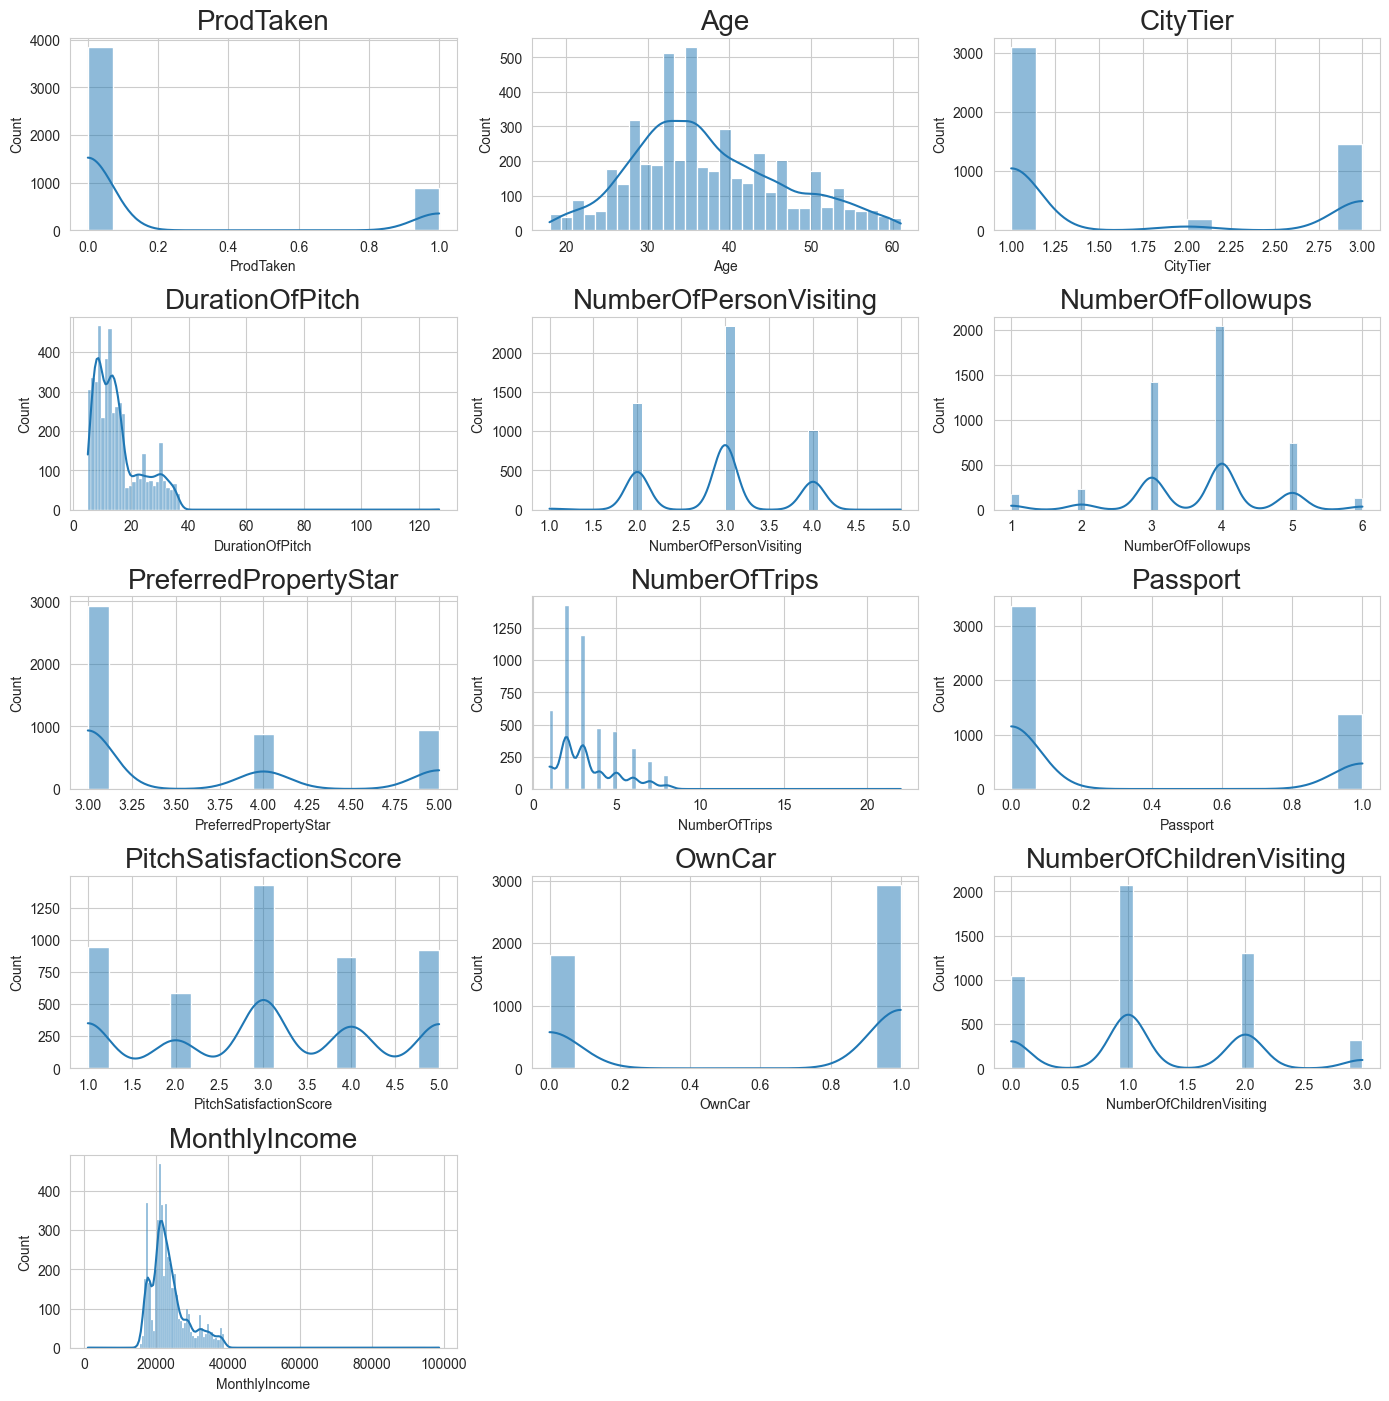

In [31]:
# Plotting histogram along with KDE to study distribution.

# Before Removing Outliers

Uni_num = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(14,50))
for i in range(len(Uni_num)):     #creating a loop that will show the plots for the columns in one plot
    plt.subplot(18,3,i+1)
    sns.histplot(df[Uni_num[i]],kde=True)
    plt.tight_layout()
    plt.title(Uni_num[i],fontsize=20)

plt.show();

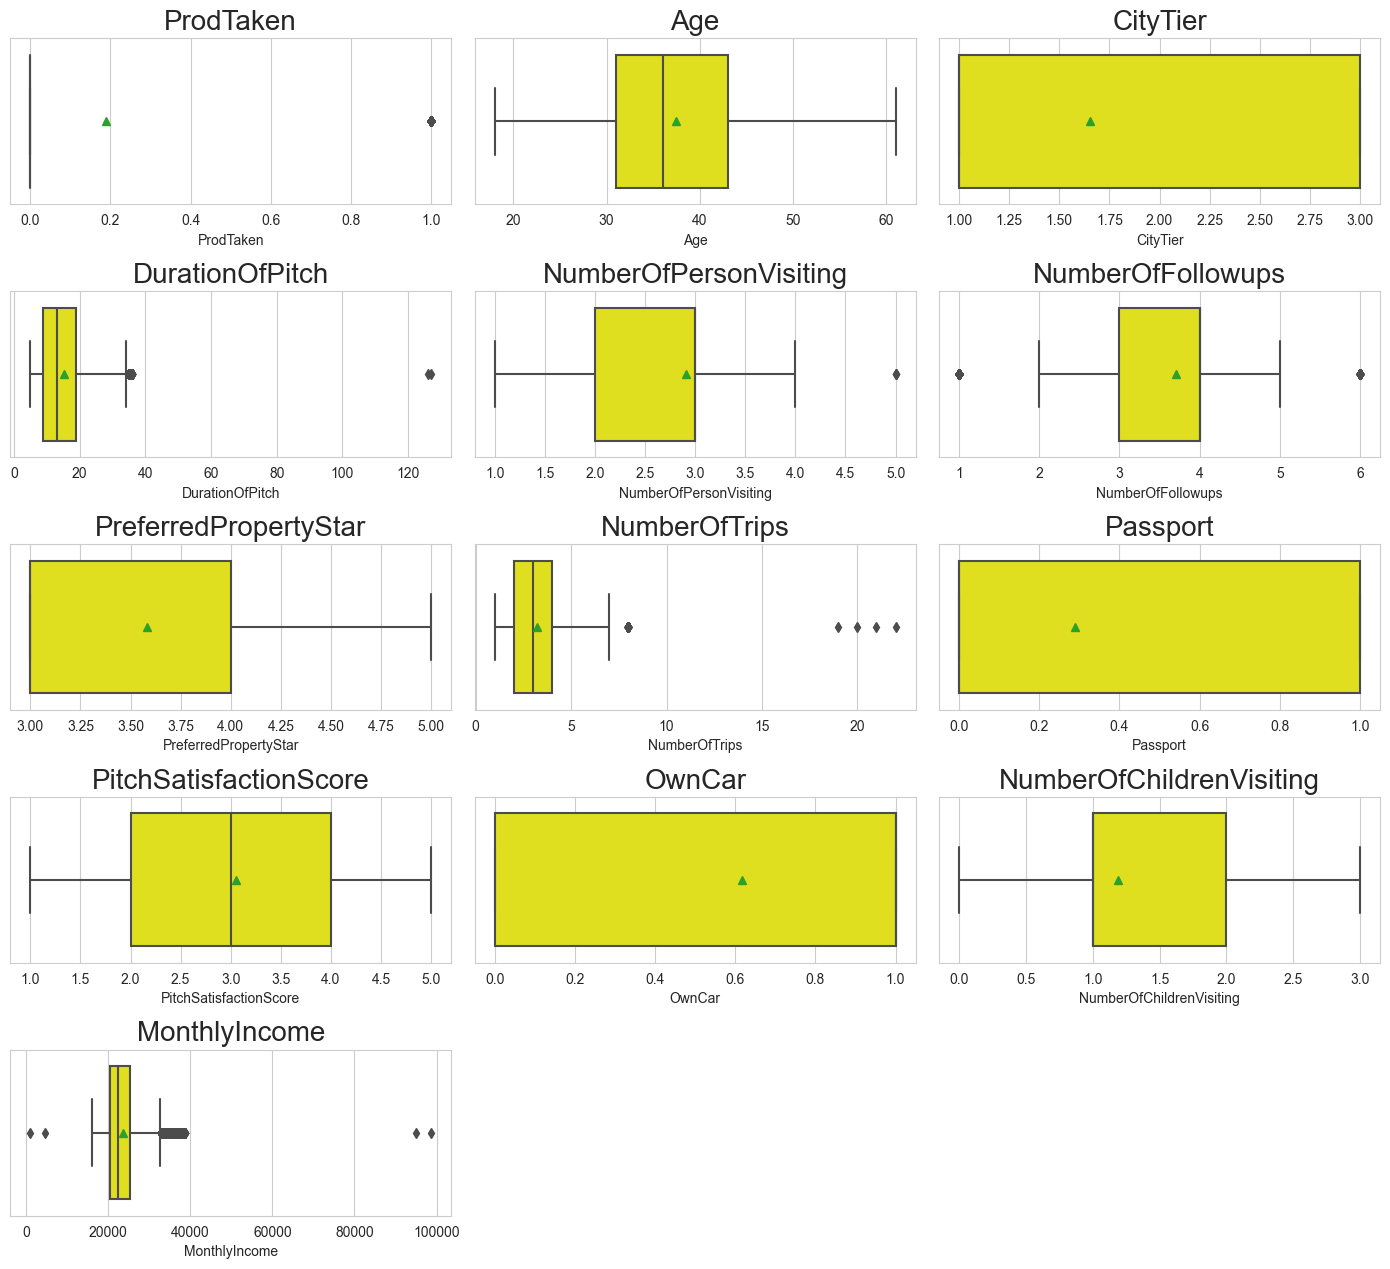

In [32]:
# Plotting Boxplots to study outliers

plt.figure(figsize=(14,25))
for i in range(len(Uni_num)):
    plt.subplot(10,3,i+1)
    sns.boxplot(df[Uni_num[i]],showmeans=True, color='yellow')
    plt.tight_layout()
    plt.title(Uni_num[i],fontsize=20)

plt.show();

> #### Observation :- From above 2 types of graphs we can conclude ...
>
> - Age variable is almost normally distributed with absolutely no outlier.
> - DurationOfPitch variable is right skewed that means there are outliers on the right side. Boxplot confirms it by showing outliers beyond 34 upto 120.
> - NumberOfTrips variable is right skewed. Boxplot shows some outliers beyond 7. An average customer is taking 3 trips each year.
> - MonthlyIncome variable is right skewed means it also has outliers. Looking at the boxplot, we can see majority of customers earn between 20k to 30k. This variable has many outliers on the higher end beyond 32,760 and 2 outliers below lower limit of 13K.
> - NumberOfFollowups also has a few outliers on both end. Majority of followups are done between 3 and 5 times.

In [33]:
# Replacing Outlier with median values

def outlier_threshold(data, column_name, q1_range, q3_range):
    q1 = df[column_name].quantile(q1_range)
    q3 = df[column_name].quantile(q3_range)
    IQR = q3 - q1
    upper_fence = q3 + 1.5*IQR
    lower_fence = q1 - 1.5*IQR
    return lower_fence, upper_fence

outlier_columns = ['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']

for i in outlier_columns:
    lower_fence, upper_fence =  outlier_threshold(df,i,0.25,0.75)
    median = df.loc[(df[i]>lower_fence) & (df[i]<upper_fence),[i]].median()
    df[i] = df[i].mask((df[i]<lower_fence) | (df[i]>upper_fence), median)

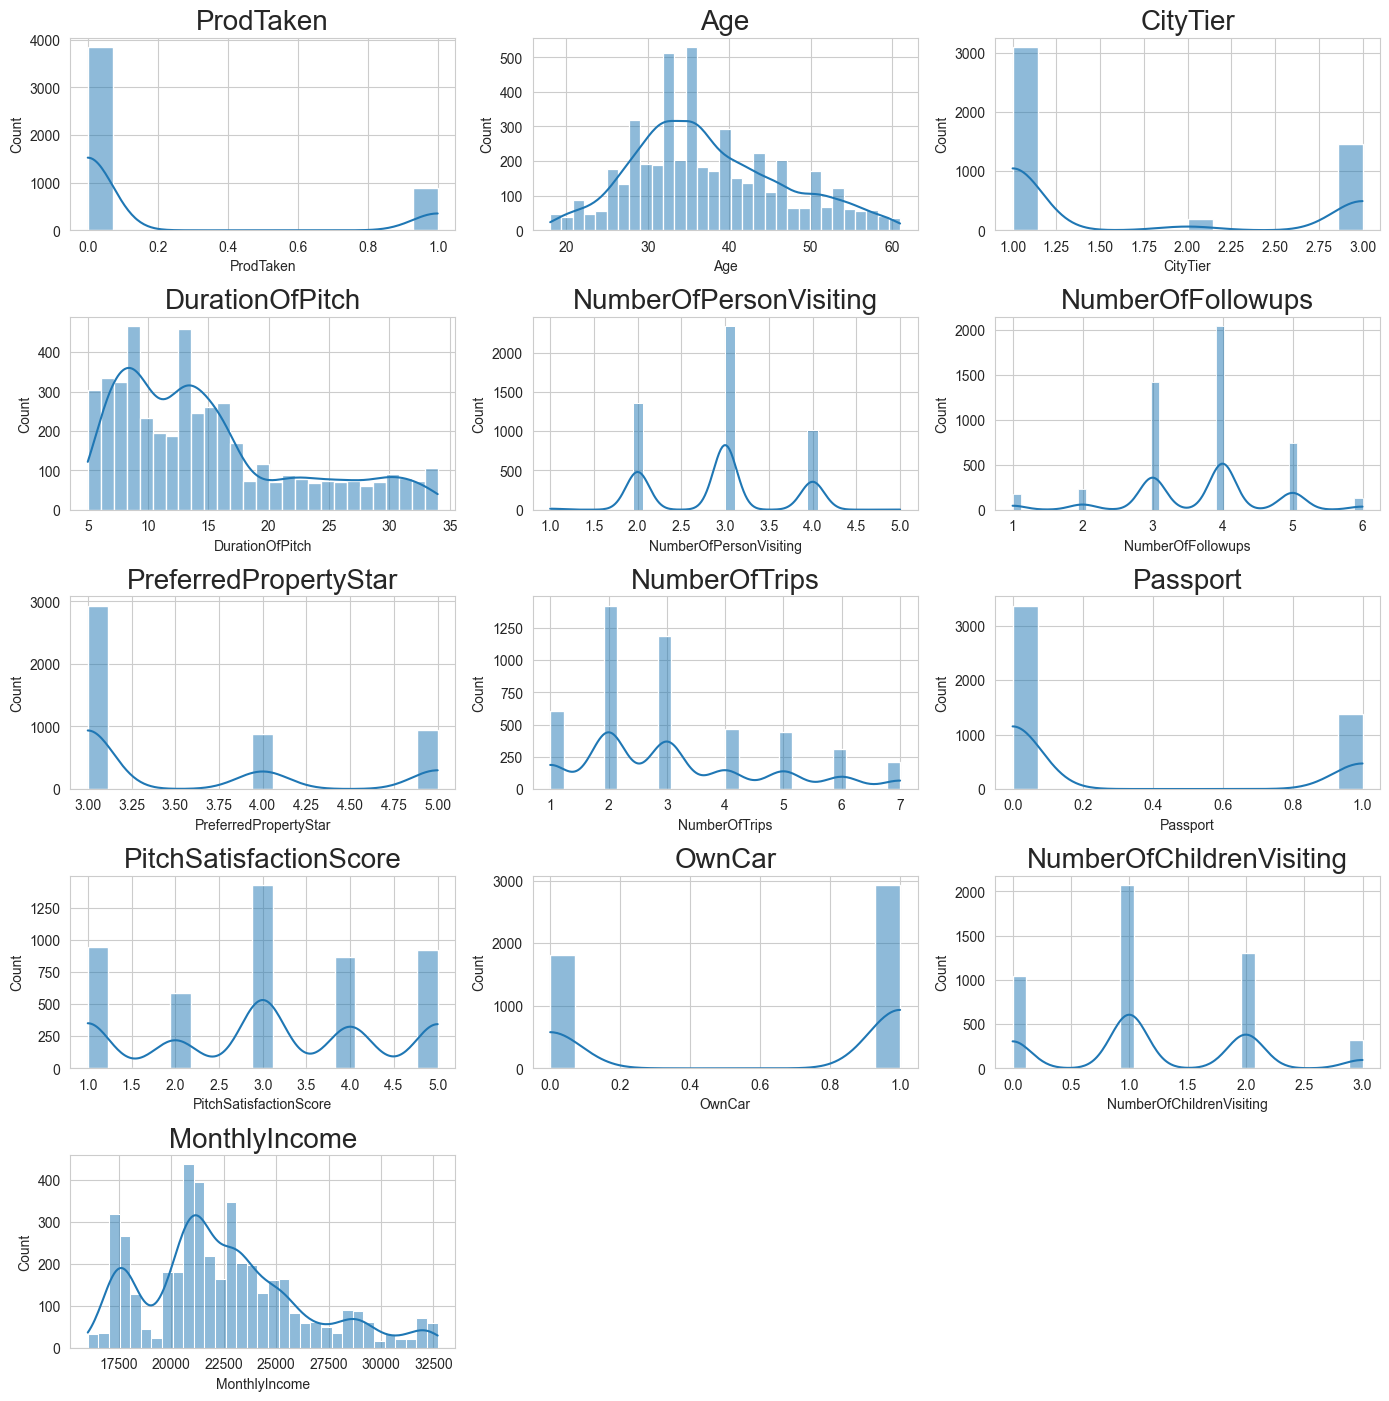

In [34]:
# Checking Distribution after replacing Outliers with median values

plt.figure(figsize=(14,50))
for i in range(len(Uni_num)):     #creating a loop that will show the plots for the columns in one plot
    plt.subplot(18,3,i+1)
    sns.histplot(df[Uni_num[i]],kde=True)
    plt.tight_layout()
    plt.title(Uni_num[i],fontsize=20)

plt.show();

> #### Observation :-
>
> - Now there is no skewed chart after replacing outliers.

> ### Univariate Analysis - Categorical Columns

In [35]:
cat_col = df.select_dtypes(exclude=np.number).columns.tolist()
other = ['OwnCar', 'ProdTaken', 'CityTier', 'Passport','NumberOfPersonVisiting', 'NumberOfChildrenVisiting', 'PitchSatisfactionScore']
for i in other:
    cat_col.append(i)

cat_col

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation',
 'OwnCar',
 'ProdTaken',
 'CityTier',
 'Passport',
 'NumberOfPersonVisiting',
 'NumberOfChildrenVisiting',
 'PitchSatisfactionScore']

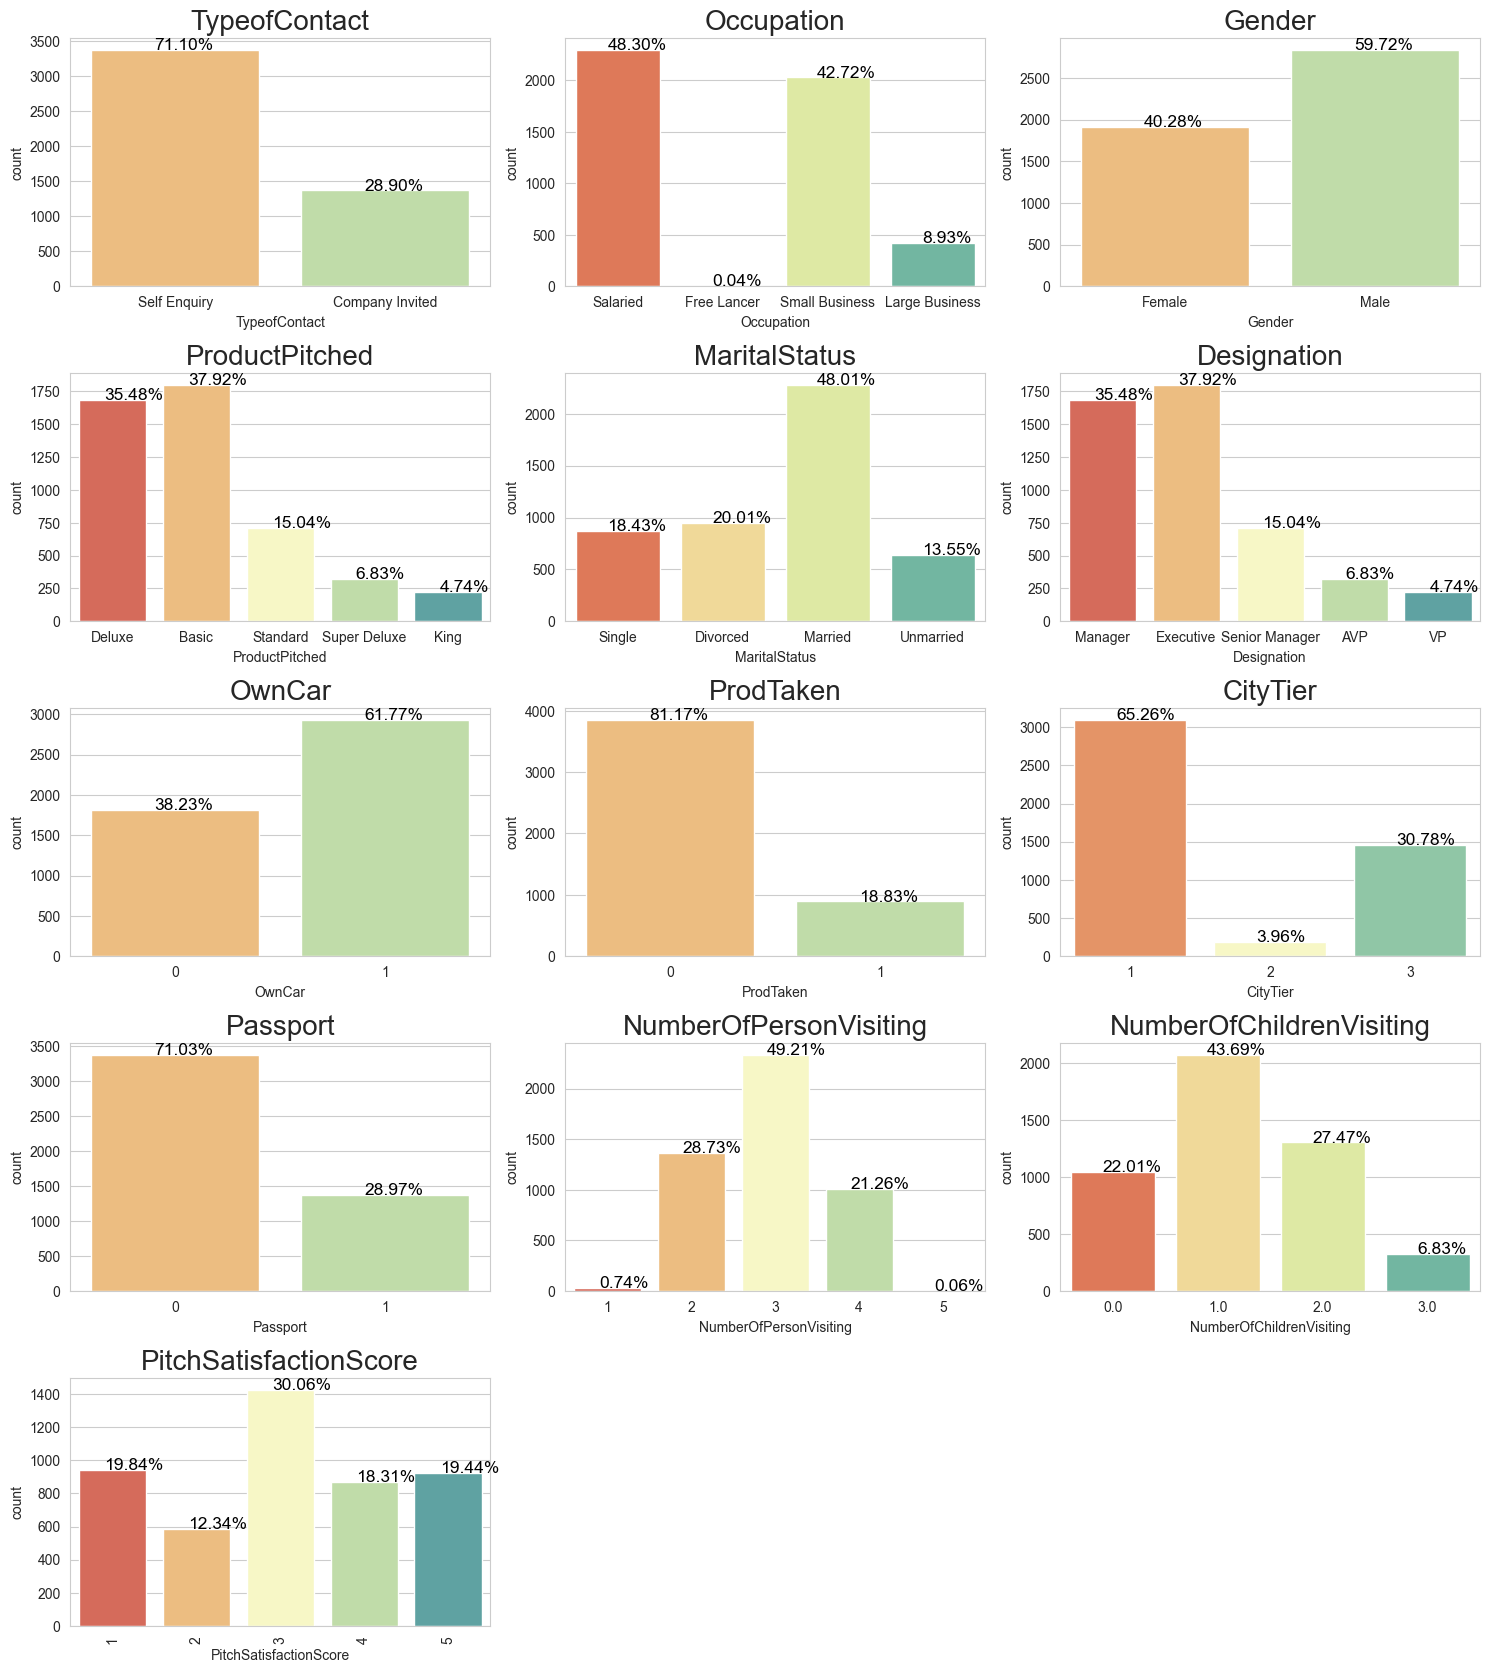

In [36]:
plt.figure(figsize=(15,60))
for i in range(len(cat_col)):     #creating a loop that will show the plots for the columns in one plot
    plt.subplot(18,3,i+1)
    ax=sns.countplot(df[cat_col[i]],palette='Spectral')
    plt.tight_layout()
    plt.title(cat_col[i],fontsize=20)
    total = len (df[cat_col[i]])
    for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + (p.get_width() / 2)-0.1  # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12.5,color='black') # To annonate
plt.xticks(rotation=90)
plt.show();

> #### Observation :-
>
> - Out of all clients, only 18.8% purchased the product. That means almost every 1 out of 5 will purchase the travel package.
> - 65.2% customers are from Tier 1 cities followed by Tier 3 cities (30.7%).
> - 71% Customers prefer to self-enquire. On the other hand 29% prefer Company Invited.
> - 48.3% of customers are Salaried followed by Small Business Owners with 42.7%
> - Male customers (59.7%) took over Female customers(40.3%).
> - Basic Product (37.9%) is pitched the most followed by Deluxe (35.4%) category product. Whereas King Travel Package is being sold the least with only 4.7%.
> - Married customers top the chart with huge 48%, followed by Divorced(20%) and Single(18%). Unmarried (13.5%) category maybe considered as single which will take total percentage of singles to 31%.
> - Executives (37.9%) & Managers (35.4%) are the top designations who travel the most.
> - 61.7% of customers owns a car.
> - 71.3% of customers doesn't have passport so selling international travel package shouldn't be first pick.
> - Hardly anyone travel alone. A Group of 3 is the highest number who travel together with 49.2% followed by a group of 2 and 4 with 28.7% and 21.2% respectively.
> - Most of the time 1 child (43.7%) travel along with parents whereas 27.4% of parents have 2 children to travel along. This data makes sense if we compare it with 'Number of Person Visiting' as in later section we saw 3-4 people travel a lot.
> - 30% Customers have given 3 score to Pitch given by company. A big number of customers (almost 20%) have rated 1 star to the pitching. This area need improvement as it directly impact the sales.



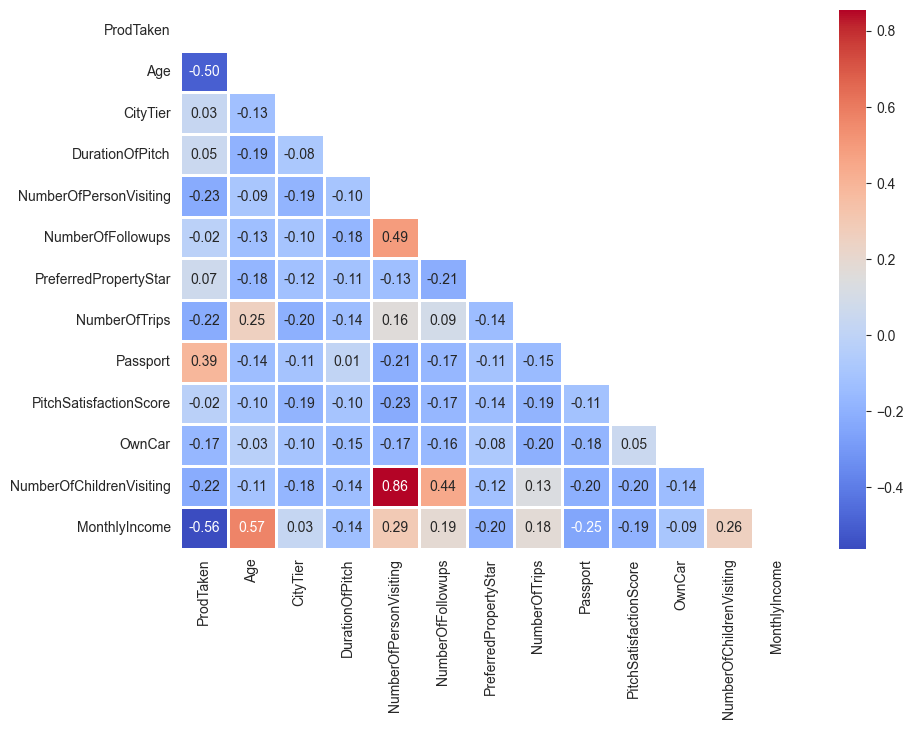

In [37]:
# Finding correlation between all features/columns

corr = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr.corr(method='pearson'), annot=True, cmap='coolwarm', linewidths=0.75, fmt='.2f', mask=np.triu(corr.corr(method='pearson')))
plt.show();

> #### Observation :-
>
> - Except a few columns, all variables have a low correlation.
> - Number of Person Visiting & Number of Children Visiting has a HIGH correlation.
> - Age & Monthly Income also has the second-highest positive correlation. We can make out as age increasing, monthly income also increasing.
> - More the followups, more the number of people visiting.
> - Monthly Income & Product Taken has highly negative correlation. Means travelling has nothing to do with high income.



> ### Bivariate Analysis

ValueError: num must be 1 <= num <= 12, not 13

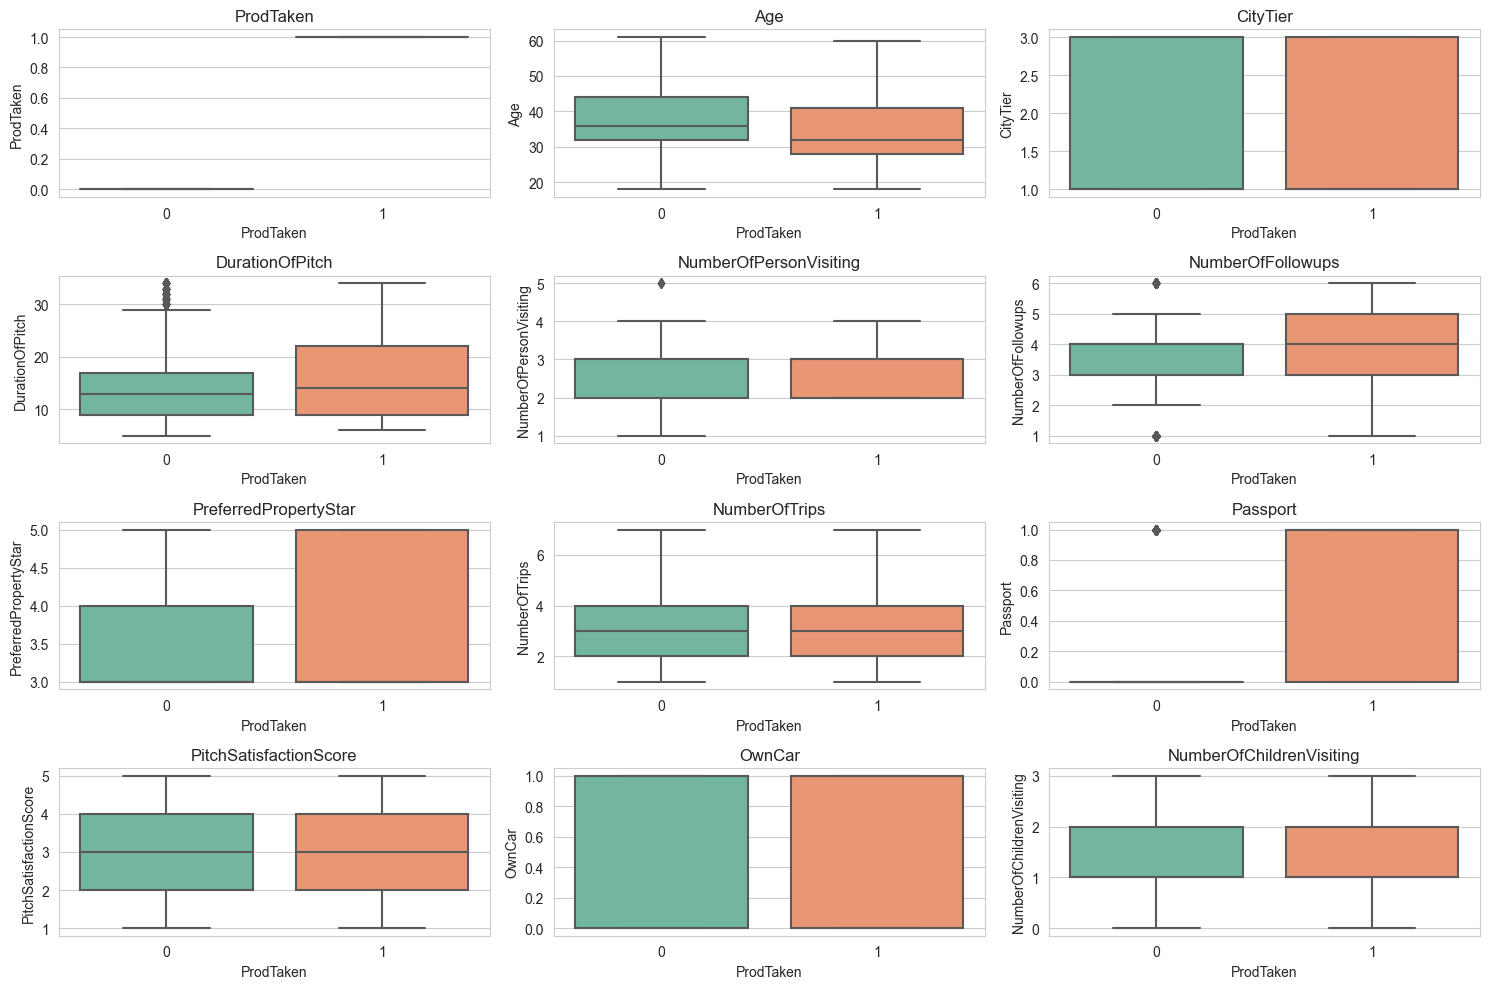

In [38]:
# For all numerical variables with Personal_Loan
plt.figure(figsize=(15,10))
for i, variable in enumerate(Uni_num):
    plt.subplot(4,3,i+1)
    sns.boxplot(df['ProdTaken'],df[variable],palette="Set2")
    plt.tight_layout()
    plt.title(variable)
plt.show();

> #### Observation :-
>
> - Those who purchased the package are slightly younger than the counterpart.
> - Buyers and Non-Buyers are more or less belong to same City Tiers.
> - Non-Buyers category has many outliers in Duration of Pitch varibale whereas Buyers category doesn't has any outlier. That means duration of sales pitch has nothing to do with the purchase.
> - Number of Followups are more in the customers who purchased the package. Doing more follow-ups seems to be proven to work formula.
> - All customers contain passport. Pitching international package would be ideal.


In [39]:
# Stacked plot of categorical variables with Product Taken

def stacked_plot(x):
    sns.set(palette='Dark2')
    tab = pd.crosstab(x,df['ProdTaken'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(7,4))
    plt.legend(loc='lower left', frameon=True)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.ylabel('Percentage')
    plt.show();

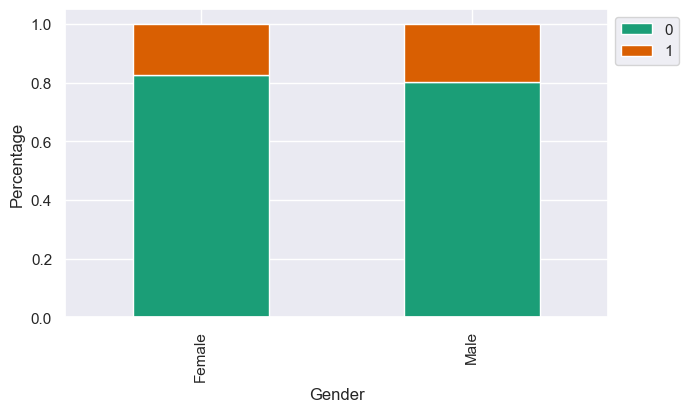

In [40]:
stacked_plot(df.Gender)

- Previously we noticed that Male percentage is quite higher than females. But here we can see males and females customers purchasing product in almost equal percentage.

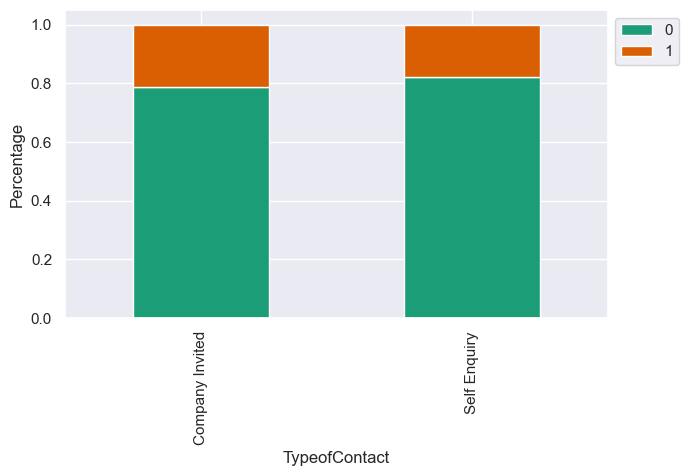

In [41]:
stacked_plot(df.TypeofContact)

- More Customers who are invited by company purchased the Travel Package.

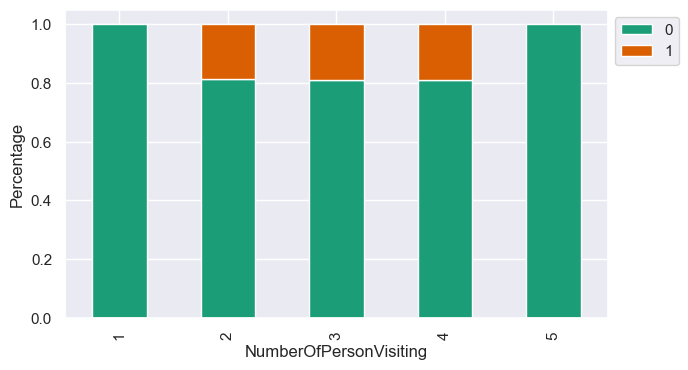

In [42]:
stacked_plot(df.NumberOfPersonVisiting)

- There is no customer who either travel alone or in a group more than 4.
- Majortiy of customers who purchased the package prefer to travel in a group of 2-4.

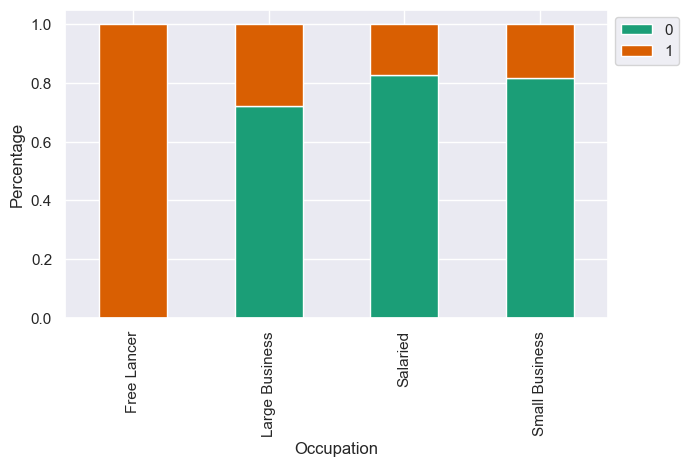

In [43]:
stacked_plot(df.Occupation)

- Free Lancers were very less in our sample and out of them all purchased the travel package. If travel package purchase stats remain high in more samples then pitching the package to Free Lancers would be a good idea.
- Large Business owners take the lead in other occupations.
- Salaried people are least in terms of purchasing travel package.

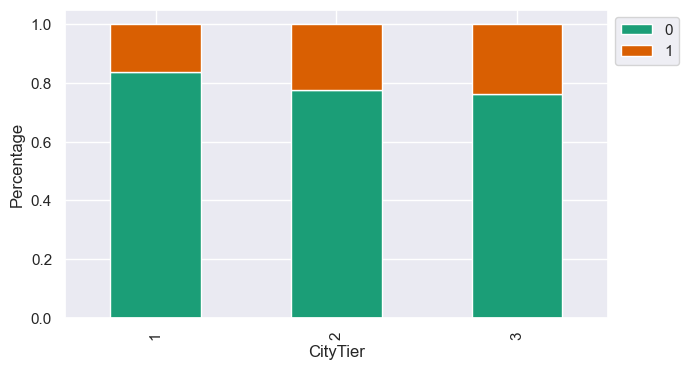

In [44]:
stacked_plot(df.CityTier)

- Customer from Tier 3 city travel the most followed by Tier 2 city.

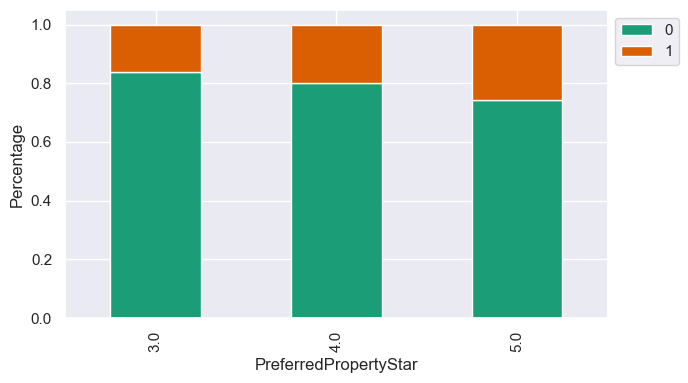

In [45]:
stacked_plot(df.PreferredPropertyStar)

- Majority of travellers preferring 5-star Hotels!
- 4-star and 3-star are second and third preferences respectively.
- Pitching expensive hotel will work out good.

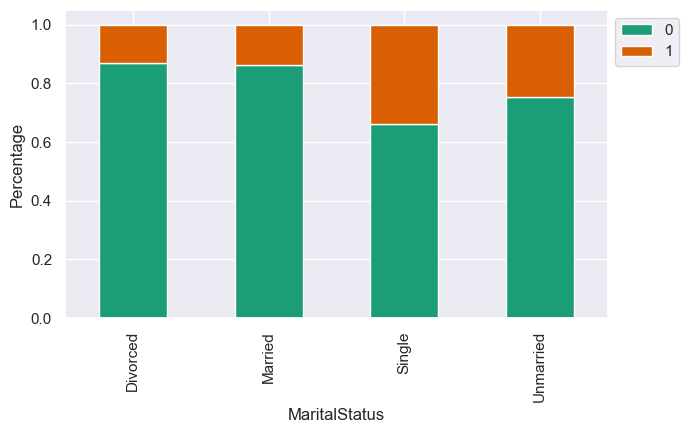

In [46]:
stacked_plot(df.MaritalStatus)

- People with martial status as Single are highly likely to purchase the travel package.
- Those who are unmarried, maybe characterized as singles, are second most travel package buyers.
- Married and Divorced people doesn't travel much.

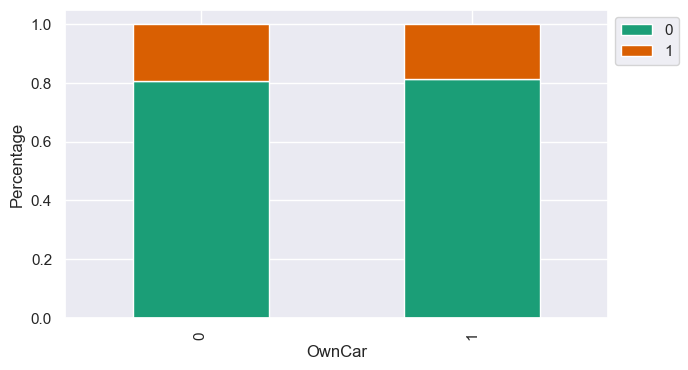

In [47]:
stacked_plot(df.OwnCar)

- Owning a car has almost nothing to do with the stats of purchasing Travel package.

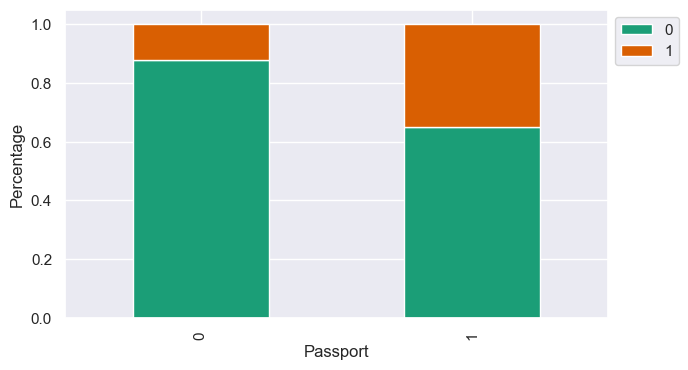

In [48]:
stacked_plot(df.Passport)

- A Huge number of people who purchase package owns a passport.

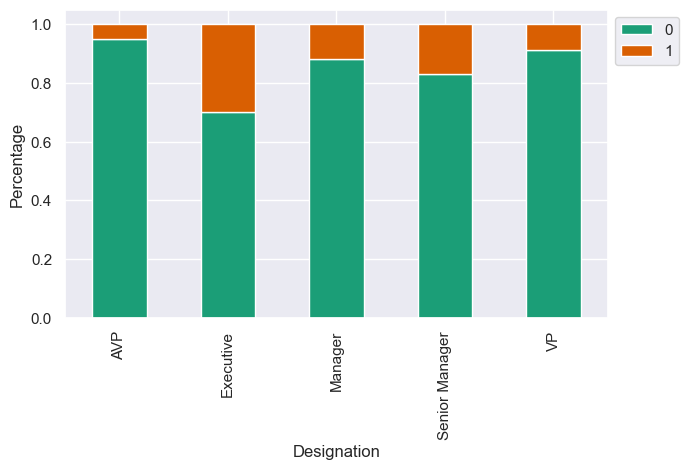

In [49]:
stacked_plot(df.Designation)

- Executives top the chart in purchasing travel package.
- Senior Managers takes the second spot.
- VP/AVP are less likely to purchase product.

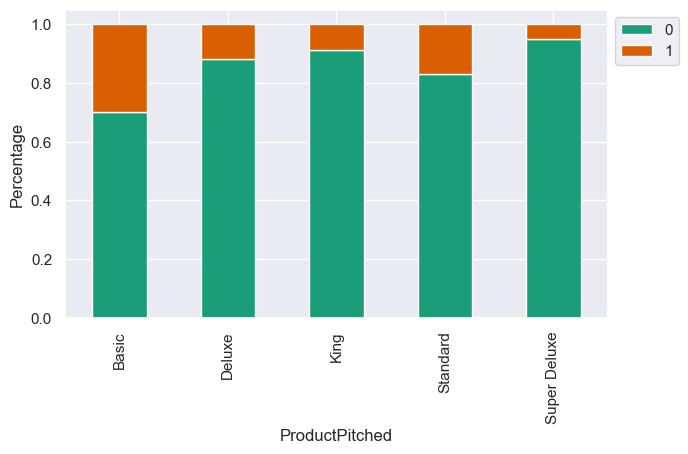

In [50]:
stacked_plot(df.ProductPitched)

- Mostly customers purchase Basic Travel Package.
- Standard category travel package is the runner up.
- Surprisingly, people take basic or standard package most but they prefer to stay in 4-5 star hotel!

# Conclusion

***“If you torture data long enough, it will confess to anything”*** - by Ronald Coase

That's it! We reached the end of our EDA Report on Travel Package Purchase.

Throughout this report we put in many of the strategies used in Data Profiling, Statistical Analysis & Graph Based analysis. We philosophied about the variables, we analysed 'ProdTaken' with the most correlated variables, we dealt with missing data and outliers, we tested some fundamental statistical assumptions on both categorical and numerical features.

Our Step 1 - Data Profiling made a lot of our simple.
In Step 2 - Statistical Analysis, we figured out some hidden information inside the data. This step begins the real information extraction from the data. We were able to see correlation between variables, their distribution which helped us find their skewness which further lead us to look at the outliers in the dataset.
Step 3 - Graphical Analysis made the picture even clearer. With visual representation we were able to see how variables actually correlating with each other. We took 'ProdTaken' as a parameter to correlate it with other variables to find out what are the characteristics of a person who purchase travel package.

> ##### Below are the stats of people who purchased travel package :-
> - Younger people are more likely to travel.
> - Single & Unmarried are more likely to say yes to purchase.
> - Females and Males are equal in terms of travelling.
> - If company invite people to sell their package, it will prove to work. Though a lot many people self-enquire.
> - Even though singles & unmarried top the chart, but not even a single person travelled alone. 2-4 is preferred group.
> - Large Business & Small Business Owners are more likely to say YES to purchase as compared to Salaried people.
> - Majority of customers are from Tier 3 cities, followed by Tier 2 closely.
> - People prefer to stay in 5-star Hotels, followed by 4 and 3-stars respectively.
> - Passport Owners purchase travel packages more than non holders.
> - Executives & Senior Managers travel more than Managers. VP/AVP travel least.
> - People prefer to purchase Basic & Standard travel packages.